In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,models,layers
import matplotlib.pyplot as plt
import numpy as np


In [6]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

In [7]:
X_train.shape
X_test.shape

(10000, 32, 32, 3)

In [8]:
Y_train[:5] # converting the 2-dimensional array into one dimension
Y_train = Y_train.reshape(-1,)
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
labels = ["airplane","automobile","bird","cat", "deer","dog","frog","horse","ship","truck"]

In [10]:
# let's plot some sample to see the dataset\
# creating a function to easily plot the image with their label based on the training image
def plot_image(X,Y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(labels[Y[index]])

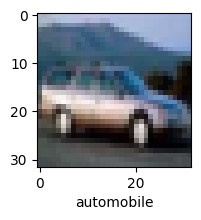

In [53]:
plot_image(X_train,Y_train,4)

In [11]:
# normalizing our data;
X_train = X_train/255
X_test = X_test/255

In [52]:
# first trying to make artificial neural network
ann = keras.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer = "SGD",
           loss='sparse_categorical_crossentropy',
           metrics = ['accuracy'])
ann.fit(X_train,Y_train,epochs = 5)


Epoch 1/5


1563/1563 [==============================] - 170s 107ms/step - loss: 1.8161 - accuracy: 0.3528
Epoch 2/5
1563/1563 [==============================] - 194s 124ms/step - loss: 1.6244 - accuracy: 0.4240
Epoch 3/5
1563/1563 [==============================] - 175s 112ms/step - loss: 1.5429 - accuracy: 0.4559
Epoch 4/5
1563/1563 [==============================] - 171s 109ms/step - loss: 1.4839 - accuracy: 0.4791
Epoch 5/5
1563/1563 [==============================] - 163s 104ms/step - loss: 1.4335 - accuracy: 0.4957


In [55]:
ann.evaluate(X_test,Y_test)

313/313 [==============================] - 7s 22ms/step - loss: 1.4658 - accuracy: 0.4830


[1.4658253192901611, 0.4830000102519989]

In [76]:
prediction = ann.predict(X_train)
prediction

1563/1563 [==============================] - 34s 22ms/step


array([[0.731726  , 0.6327982 , 0.47938716, ..., 0.60660267, 0.01275464,
        0.06262445],
       [0.72838086, 0.9930677 , 0.11759574, ..., 0.24639767, 0.8890368 ,
        0.92478013],
       [0.5618676 , 0.84673005, 0.09307557, ..., 0.60392743, 0.8408449 ,
        0.9902596 ],
       ...,
       [0.87425447, 0.932305  , 0.23874773, ..., 0.4339755 , 0.8887871 ,
        0.993673  ],
       [0.9318928 , 0.97237724, 0.19128804, ..., 0.2034196 , 0.96931714,
        0.9743615 ],
       [0.8004943 , 0.7502158 , 0.16656034, ..., 0.70587146, 0.581149  ,
        0.8007007 ]], dtype=float32)

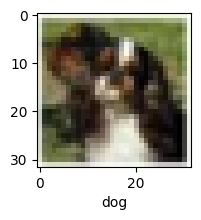

In [88]:
plot_image(X_train,Y_train,500)

In [89]:
labels[np.argmax(prediction[500])]

'dog'

In [14]:
# now making a cnn model
cnn = keras.Sequential([
    #cnn layer 1
    layers.Conv2D(filters=32 , kernel_size = 3 , activation = 'relu', input_shape= (32,32,3)),
    layers.MaxPooling2D((2,2)),

    #cnn layer 2
    layers.Conv2D(filters=64 , kernel_size = 3 , activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    # dense layer'
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
    
])

In [16]:
cnn.compile(optimizer = 'adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
            )

In [17]:
cnn.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 51s 31ms/step - loss: 1.4561 - accuracy: 0.4783
Epoch 2/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.1061 - accuracy: 0.6123
Epoch 3/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9759 - accuracy: 0.6586
Epoch 4/10
1563/1563 [==============================] - 48s 30ms/step - loss: 0.8930 - accuracy: 0.6906
Epoch 5/10
1563/1563 [==============================] - 46s 30ms/step - loss: 0.8214 - accuracy: 0.7155
Epoch 6/10
1563/1563 [==============================] - 19552s 13s/step - loss: 0.7649 - accuracy: 0.7341
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7128 - accuracy: 0.7520
Epoch 8/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6669 - accuracy: 0.7674
Epoch 9/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.6246 - accuracy: 0.7853
Epoch 10/10
1563/1563 [==============================] - 19s 1

In [96]:
Y_test = Y_test.reshape(-1,)


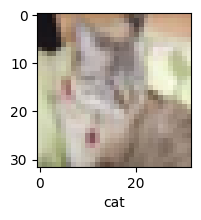

In [109]:
plot_image(X_test,Y_test,8)

In [99]:
predicted = cnn.predict(X_test)

313/313 [==============================] - 2s 7ms/step


In [101]:
predicted_index = [np.argmax(i) for i in predicted]


In [110]:
labels[predicted_index[8]]

'cat'